# 再线性回归模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 2 * np.random.random(size=100)
print(x)

[1.53319985 0.35924804 0.55558289 1.06329973 0.75328401 1.71893506
 0.20908803 1.07869972 0.78077417 0.03040236 0.14542448 1.32365233
 1.51993902 1.71961323 0.29405104 1.32772814 0.57724961 0.98947937
 1.20694284 0.77197066 0.5503266  1.78702385 1.93945084 1.81046527
 1.23247144 0.12473288 1.09167276 1.21603081 1.32531962 1.50389449
 0.18046302 1.99473454 0.64798385 0.19878685 0.76223764 0.94525664
 1.95664676 1.36357402 1.39114523 1.08684319 1.0648052  0.10709706
 1.22338075 0.26127995 1.50450297 1.10440358 0.9323616  0.13473183
 1.82799424 0.41097201 0.91722916 0.90553779 0.89661096 0.39712896
 1.61354319 1.46799088 0.17607998 0.29068116 0.65202786 0.3077055
 0.26153457 1.33522089 0.41622351 0.20638665 0.3957682  0.44612367
 1.91050173 1.90149922 1.25111896 1.43187371 1.08403766 0.15009245
 1.06562351 1.78286983 1.62468539 1.8866013  1.71631497 0.65642712
 0.46258241 1.8227113  1.49411216 0.12768953 0.58798029 0.02486138
 0.11182681 1.37937161 0.3862103  0.93106752 1.3639754  1.60419

In [3]:
np.random.seed(666)
y = x * 3. + 4. + np.random.normal(size=100)
print(y)

[ 9.42378762  5.55771012  6.8402167   8.09894725  5.68813057  9.0473079
  4.64629236  6.2923381   6.98289567  3.3047639   5.04514344  7.03994515
  9.5380393   8.42192163  4.58342051  7.52259703  4.64295583  6.39266738
  5.93792774  6.54509722  3.89435456 10.20570416 10.09557239 10.28429733
  7.89201393  5.68483634  8.81886189  7.1190444   7.31948657  8.31017776
  3.84077323 10.67134156  5.91787579  3.76660223  6.5832667   6.52309041
  9.258639    7.26897056  9.07055838  7.39660819  6.93576081  5.43205683
  7.48171787  4.74235056  7.52871699  5.960929    6.99140866  4.67143484
  9.05750903  6.68065107  6.55538138  8.2347585   6.76705475  5.12739556
  9.78655298  9.60806365  4.07699922  3.28459698  4.08722811  5.02349386
  1.68973311 11.39917945  5.12200175  3.6820297   5.75282988  5.65426849
  8.93578294 10.20957337  8.078181    9.25643641  7.28238165  5.02633011
  7.12695014  9.99410427  8.26846597 11.399055    9.86044905  5.7986313
  6.18787726 10.14588899  7.53190789  4.32599195  6.1

In [4]:
X = x.reshape(-1, 1)
print(X)

[[1.53319985]
 [0.35924804]
 [0.55558289]
 [1.06329973]
 [0.75328401]
 [1.71893506]
 [0.20908803]
 [1.07869972]
 [0.78077417]
 [0.03040236]
 [0.14542448]
 [1.32365233]
 [1.51993902]
 [1.71961323]
 [0.29405104]
 [1.32772814]
 [0.57724961]
 [0.98947937]
 [1.20694284]
 [0.77197066]
 [0.5503266 ]
 [1.78702385]
 [1.93945084]
 [1.81046527]
 [1.23247144]
 [0.12473288]
 [1.09167276]
 [1.21603081]
 [1.32531962]
 [1.50389449]
 [0.18046302]
 [1.99473454]
 [0.64798385]
 [0.19878685]
 [0.76223764]
 [0.94525664]
 [1.95664676]
 [1.36357402]
 [1.39114523]
 [1.08684319]
 [1.0648052 ]
 [0.10709706]
 [1.22338075]
 [0.26127995]
 [1.50450297]
 [1.10440358]
 [0.9323616 ]
 [0.13473183]
 [1.82799424]
 [0.41097201]
 [0.91722916]
 [0.90553779]
 [0.89661096]
 [0.39712896]
 [1.61354319]
 [1.46799088]
 [0.17607998]
 [0.29068116]
 [0.65202786]
 [0.3077055 ]
 [0.26153457]
 [1.33522089]
 [0.41622351]
 [0.20638665]
 [0.3957682 ]
 [0.44612367]
 [1.91050173]
 [1.90149922]
 [1.25111896]
 [1.43187371]
 [1.08403766]
 [0.15

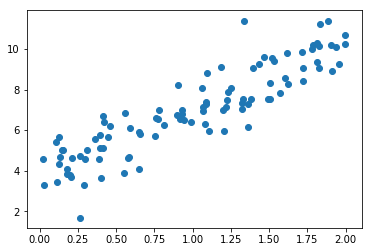

In [5]:
plt.scatter(x, y)
plt.show()

# 使用梯度下降法训练

In [6]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')

In [7]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return res * 2/len(X_b)

In [8]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4 - 1, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        
        i_iter += 1
    return theta

In [9]:
X_b = np.hstack([np.ones((len(X), 1)), x.reshape(-1, 1)])
X_b
initial_theta = np.zeros(X_b.shape[1])
initial_theta
eta = 0.1
theta = gradient_descent(X_b, y, initial_theta, eta)
theta

array([3.74001774, 3.25307677])

# 使用封装好的方法

In [10]:
from playML.LinearRegression import LinearRegression

In [11]:
lin_reg = LinearRegression()

In [12]:
lin_reg.fit_gd(X, y)

LinearRegression()

In [13]:
lin_reg.coef_

array([3.25445268])

In [14]:
lin_reg.intercept_

3.738394959020484